(fundamentals:exercise)=
# Upper air analysis

Upper air analysis is fundamental for many synoptic and mesoscale analysis problems. In this tutorial we will gather weather balloon data from the  Integrated Global Radiosonde Archive (IGRA) database \[[link](https://www.ncei.noaa.gov/products/weather-balloon/integrated-global-radiosonde-archive)\]. The database consists of radiosonde and pilot balloon observations from more than 2,800 globally distributed stations. Recent data become available in near real time from about 800 stations worldwide. Observations are available at standard and variable pressure levels, fixed and variable-height wind levels, and the surface and tropopause. Variables include pressure, temperature, geopotential height, relative humidity, dew point depression, wind direction and speed, and elapsed time since launch.

After we downloaded the data, we create a skew-T diagram, perform a series of thermodynamic calculations, and summarize the results. 

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>How to access the IGRA database via Python</li>
 <li>Understand the sturcture of the IGRA radiosounding data</li>
 <li>Get a better understanding of the atmospheric stratification</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>Approach:</b><br>
<ul>
 <li>Download IGRA radiosounding data</li>
 <li>Create a skew-T diagram from the data</li>
 <li>Thermodynamic calculation</li>
 <li>Summize the results</li>
</ul>  
</div>

In [134]:
# Import some auxiliary packages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load some standard python packages
import numpy as np
import matplotlib.pyplot as plt

## Download station list

Read the station list into pandas DataFrame (from file igra2-station-list.txt in the IGRAv2 repository). In case you are not familiar with pandas, please check out the pandas webpage \[[link](https://pandas.pydata.org)\] 

In [135]:
# Load the IGRAv2 radiosonde tools
import igra

# Load pandas
import pandas

# Get the station list and store it in the tmp folder
stations = igra.download.stationlist('./tmp')

Download complete, reading table ...
Data read from: ./tmp/igra2-station-list.txt
Data processed 2878


In [136]:
# Have a look at the data
stations

,wmo,lat,lon,alt,state,name,start,end,total
id,,,,,,,,,
ACM00078861,078861,17.1170,-61.7830,10.0,,COOLIDGE FIELD (UA),1947,1993,13896
AEM00041217,041217,24.4333,54.6500,16.0,,ABU DHABI INTERNATIONAL AIRPOR,1983,2023,39193
AEXUAE05467,,25.2500,55.3700,4.0,,SHARJAH,1935,1942,2477
AFM00040911,040911,36.7000,67.2000,378.0,,MAZAR-I-SHARIF,2010,2014,2179
AFM00040913,040913,36.6667,68.9167,433.0,,KUNDUZ,2010,2013,4540
...,...,...,...,...,...,...,...,...,...
ZZXUAICE022,,NaN,NaN,NaN,,NP22,1974,1982,2862
ZZXUAICE026,,NaN,NaN,NaN,,NP26,1983,1986,824
ZZXUAICE028,,NaN,NaN,NaN,,NP28,1986,1988,915


<div class="alert alert-block alert-warning">
<b>Tip:</b> Check out the IGRA webpage to see all available stations
</div>

## Download station

Download a radiosonde station with the *id* from the station list into tmp directory.

In [137]:
id = "GMM00010868"
igra.download.station(id, "./tmp")

https://www1.ncdc.noaa.gov/pub/data/igra/data/data-por//GMM00010868-data.txt.zip  to  ./tmp/GMM00010868-data.txt.zip
Downloaded:  ./tmp/GMM00010868-data.txt.zip


<div class="alert alert-block alert-warning">
<b>Exercise:</b> What is the ID of the INNSBRUCK-FLUGHAFEN radiosonde station?
</div>

## Read station data

The downloaded station file can be read to standard pressure levels (default). In case you prefer to download all significant levels (different amount of levels per sounding) use return_table=True. 

In [201]:
data, station = igra.read.igra(id, "./tmp/<id>-data.txt.zip".replace('<id>',id), return_table=True)

Have a look at the data

In [202]:
data

<xarray.Dataset>
Dimensions:   (date: 2943701)
Coordinates:
  * date      (date) datetime64[ns] 1976-04-03 ... 2023-04-09T12:00:00
Data variables:
    pres      (date) float64 1e+03 2e+03 3e+03 5e+03 ... 9.64e+04 9.66e+04 1e+05
    gph       (date) float64 nan nan 2.371e+04 2.044e+04 ... 853.0 nan nan nan
    temp      (date) float64 nan nan 218.9 217.3 215.1 ... 277.0 280.8 282.2 nan
    rhumi     (date) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    dpd       (date) float64 nan nan nan nan nan nan ... 3.6 2.1 4.1 7.0 8.0 nan
    windd     (date) float64 nan nan nan nan nan ... 64.45 60.0 31.43 30.0 nan
    winds     (date) float64 nan nan nan nan nan nan ... 4.889 4.0 2.096 2.0 nan
    flag_int  (date) float64 1.0 1.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 1.0
Attributes:
    ident:         GMM00010868
    source:        NOAA NCDC
    dataset:       IGRAv2
    processed:     UNIVIE, IMG
    interpolated:  to pres levs (#16)

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Find out what the individual variables are and in which unit they are given.
</div>

<div class="alert alert-block alert-warning">
<b>Advanced exercise:</b> Plot the vertical temperature profile and determine the stratification of the atmosphere at different altitudes.
</div>

## Thermodynamic Calculations

MetPy is a collection of tools in Python for reading, visualizing, and performing calculations with weather data  [[Link](https://unidata.github.io/MetPy/latest/index.html)]. Here, we use the MetPy calc module to calculate some thermodynamic parameters of the sounding.

**Lifting Condensation Level (LCL)** - The level at which an air parcel’s relative humidity becomes 100% when lifted along a dry adiabatic path.

**Parcel Path** - Path followed by a hypothetical parcel of air, beginning at the surface temperature/pressure and rising dry adiabatically until reaching the LCL, then rising moist adiabatially.

In [203]:
# Load the metpy package. MetPy is a collection of tools 
# in Python for reading, visualizing, and performing calculations 
# with weather data. 

# Module to work with units
from metpy.units import units

# Collection of calculation function
import metpy.calc as mpcalc

# Import the function to plot a skew-T diagram
from metpy.plots import SkewT

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Check out the MetPy website and familiarise yourself with the collection of meteorological functions. Which functions can be used to calculate the LCL and the parcel path?
</div>

   We pre-process the balloon data to meet the requirements of the MetPy functions. 

In [228]:
# For which day should the calculations be carried out?
timestamp = '2022-08-15T12:00'

# Select the corresponding dataset
data_subset = data.sel(date=timestamp)

# Here, the variables are prepared and units are assigned to the values
# Temperature data in degree celcius
T = (data_subset.temp.values-273.16) * units.degC

# Dewpoint temperature in degree celcius
Td = T - data_subset.dpd.values * units.delta_degC

# Wind speed in meter per second
wind_speed = data_subset.winds.values * units('m/s')

# Wind direction in degrees
wind_dir = data_subset.windd.values * units.degrees

# Pressure in Hektapascal
p = (data_subset.pres.values/100) * units.hPa

# Since MetPy assumes the arrays from high to lower pressure, 
# but the IGRA data is given from low to high pressure, the 
# arrays must be reversed.
p = p[~np.isnan(T)][::-1]
T = T[~np.isnan(T)][::-1]
Td = Td[~np.isnan(Td)][::-1]
wind_speed = wind_speed[~np.isnan(wind_speed)][::-1]
wind_dir = wind_dir[~np.isnan(wind_dir)][::-1]

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Why was the <em>dpd</em> variable subtracted from the temperature to get the dew point temperature?
</div>

<div class="alert alert-block alert-warning">
<b>Exercise:</b> What is achieved with the statement ~np.isnan()[::-1]?
</div>

With the following command, the wind components can be calculated from the wind speed and wind direction.


In [223]:
u, v = mpcalc.wind_components(wind_speed, wind_dir)

Finally, the LCL and parcel profile can be calculated with the pre-processed data.

In [224]:
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])

# Calculate the parcel profile
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')

print('LCL pressure level: {:.2f}'.format(lcl_pressure))
print('LCL temperatur: {:.2f}'.format(lcl_temperature))

LCL pressure level: 809.54 hectopascal
LCL temperatur: 10.78 degree_Celsius


With the calculated and processed data we can finally create the Skew-T diagram.

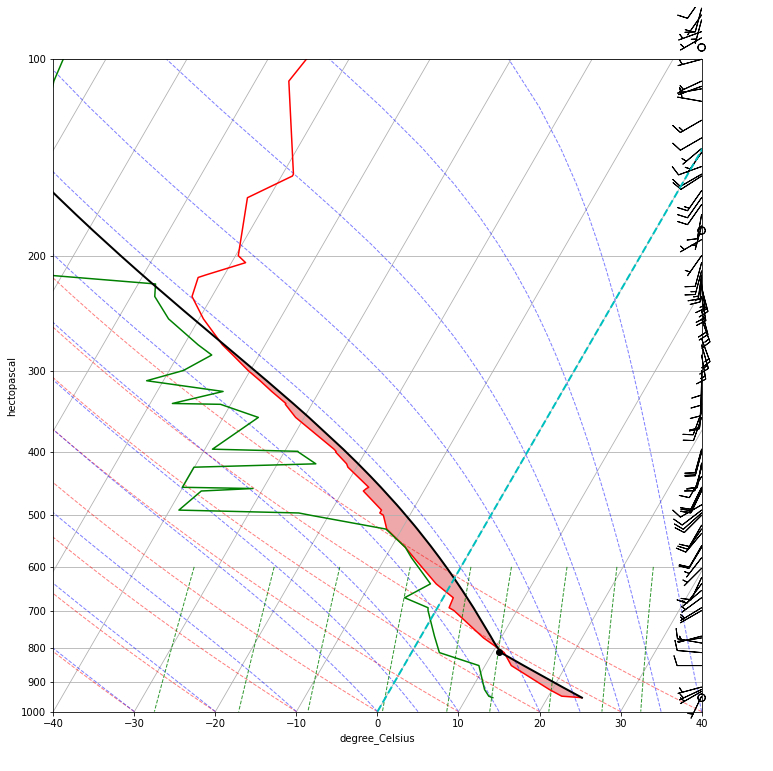

In [229]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(12, 12))
skew = SkewT(fig, rotation=30)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)

# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, parcel_prof, Td)
skew.shade_cape(p, T, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats(linewidth=1)
skew.plot_moist_adiabats(linewidth=1)
skew.plot_mixing_lines(linewidth=1)

# Show the plot
plt.show()

<div class="alert alert-block alert-warning">
<b>Exercise:</b> Take a close look at the diagram and try to understand the structure. 
<ul>
<li>What do the different coloured lines show? 
<li>What is the shaded area?  
<li>Which areas are stable or unstable stratified? 
<li>Where does condensation take place? 
</ul>
</div>